#  Turbine energy yield Prediction

## Task 1 :Linear Regression
### Name : Sandesh Sitaula
### University ID : 2059172

## Introduction
**Data Source** : https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set# 

The aim is to build a model which predicts Turbine energy yield (TEY) based on the Ambient temperature(AT), Ambient pressure (AP), Ambient humidity(AH), Air filter difference pressure (AFDP), Gas turbine exhaust pressure (GTEP), Turbine inlet temperature(TIT), Turbine after temperature(TAT), Compressor discharge pressure (CDP), Carbon monoxide(CO) and Nitrogen oxides (NOx).

## 1. IMPORTING LIBRARIES AND DATASET

In [29]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Pandas is a Python library that is commonly used in data research. It offers high-performance structures and data analysis tools that are simple to use.
* Matplotlib is a Python programming language visualization library which helps us to make different plotting charts.
* Seaborn is a matplotlib-based Python data visualization package. It has a high-level interface for creating visually appealing and instructive statistics visuals.

In [30]:
#Reading the dataset
dataset = pd.read_csv('gt_2011.csv')
# Shifting the TEY column (Target Variable) in the last column for good representation of datas 
column_names = ['AT',"AP",'AH','AFDP','GTEP','TIT','TAT','CDP','CO' ,'NOX','TEY']
dataset = dataset.reindex(columns=column_names)

In [31]:
dataset

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,11.898,0.32663,81.952,134.67
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,11.892,0.44784,82.377,134.67
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,12.042,0.45144,83.776,135.10
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,11.990,0.23107,82.505,135.03
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,11.910,0.26747,82.028,134.67
...,...,...,...,...,...,...,...,...,...,...,...
7406,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.51860,79.559,111.61
7407,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.84700,79.917,111.78
7408,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.96320,90.912,110.19
7409,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.24940,93.227,110.74


In [32]:
# showing the top 5 data
dataset.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,11.898,0.32663,81.952,134.67
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,11.892,0.44784,82.377,134.67
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,12.042,0.45144,83.776,135.10
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,11.990,0.23107,82.505,135.03
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,11.910,0.26747,82.028,134.67


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7411 entries, 0 to 7410
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7411 non-null   float64
 1   AP      7411 non-null   float64
 2   AH      7411 non-null   float64
 3   AFDP    7411 non-null   float64
 4   GTEP    7411 non-null   float64
 5   TIT     7411 non-null   float64
 6   TAT     7411 non-null   float64
 7   CDP     7411 non-null   float64
 8   CO      7411 non-null   float64
 9   NOX     7411 non-null   float64
 10  TEY     7411 non-null   float64
dtypes: float64(11)
memory usage: 637.0 KB


In [34]:
#Print dataset dimensionality.
dataset.shape

(7411, 11)

## 2. Data Understanding


Code to left align the table

In [35]:
%%html
<style>
table {float:left}
</style>

The dataset contains 11 sensor measures from a gas turbine located in Turkey's northwestern region for the purpose of studying flue gas emissions.

**Attribute Informations**:


| Variable  | Unit | Minimum | Maximum | Mean |
| :- | :- | :- | :- | :- |
| Ambient temperature (AT) | Celcius | 6.23 | 37.10 | 17.71 |
| Ambient pressure (AP) | mbar  | 985.85  | 1036.56 | 1013.07 |
| Ambient humidity (AH) | % | 24.08 | 100.20 | 77.87 |
| Air filter difference | Pressure (AFDP) mbar | 2.09 | 7.61 | 3.93 |
| Gas turbine exhaust pressure (GTEP) | mbar | 17.70 | 40.72 | 25.56 |
| Turbine inlet temperature (TIT) | C | 1000.85 | 1100.89 | 1081.43 |
|Turbine after temperature (TAT) |C | 511.04 | 550.61 | 546.16 |
|Compressor discharge pressure (CDP) |mbar | 9.85 | 15.16 | 12.06 |
| Turbine energy yield (TEY) |MWH | 100.02 | 179.50 | 133.51 |
| Carbon monoxide (CO) |mg/m3 |0.00 | 44.10 | 2.37 |
| Nitrogen oxides (NOx) |mg/m3 |25.90 | 119.91 | 65.29 |




## 3. Data Analysis

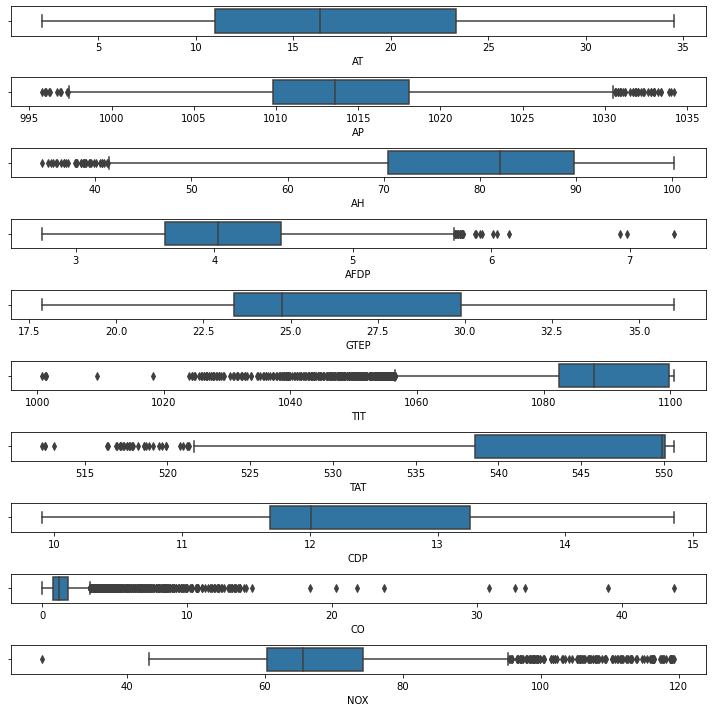

In [36]:
# Checking outliers
# AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
fig , axs= plt.subplots(10, figsize=(10,10))
cols = [dataset['AT'],dataset['AP'],dataset['AH'],dataset['AFDP'],dataset['GTEP'],dataset['TIT'],dataset['TAT'],dataset['CDP'],dataset['CO'], dataset['NOX']]
vars = ['plt1','plt2','plt3','plt4','plt5','plt6','plt7','plt8','plt9','plt10']
for i in range(10):
    vars[i] = sns.boxplot(x = cols[i],ax = axs[i])
plt.tight_layout()

**A box plot is a type of chart often used in explanatory data analysis.** Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages. Box plots show the five-number summary of a set of data: including the minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score.Box plots are useful as they provide a visual summary of the data enabling researchers to quickly identify mean values, the dispersion of the data set, and signs of skewness.

**An outlier is an observation that is numerically distant from the rest of the data.** When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot.
- Most of the Outliers are present in AP, AH, AFDP, TIT, TAT, CO and NOX columns in the dataset 

<AxesSubplot:xlabel='TEY', ylabel='Density'>

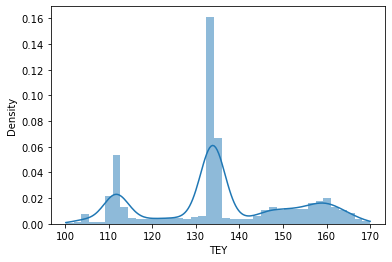

In [37]:
# Distribution of the target variable
sns.histplot(dataset['TEY'], kde=True, stat="density", linewidth=0)

**A histogram is a basic visualization tool that counts the number of data that fall into discrete bins to illustrate the distribution of one or more variables**. 

   Histplot plots univariate or bivariate histograms to show distributions of datasets. Creating a histogram provides a visual representation of data distribution. Histograms can display a large amount of data and the frequency of the data values. The median and distribution of the data can be determined by a histogram. In addition, it can show any outliers or gaps in the data.

**Datas are mostly distributed at 110, 130-140 and 150-170**

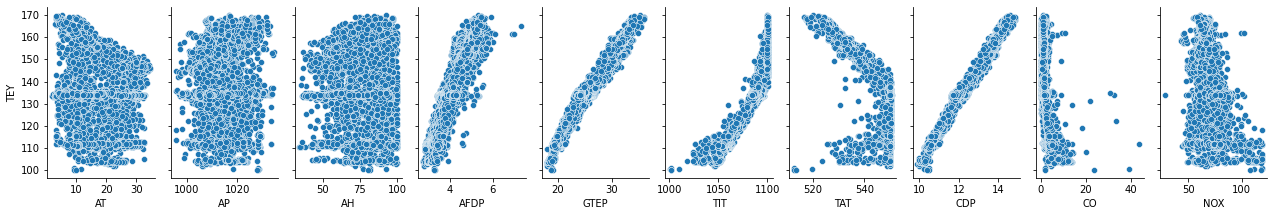

In [38]:
# Scatter Plot to Target Variable
sns.pairplot(dataset, x_vars=['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],kind='scatter',y_vars='TEY',height=3,aspect=0.6)
plt.show()

**A scatter plot is a chart type that is normally used to observe and visually display the relationship between variables.** The values of the variables are represented by dots. The positioning of the dots on the vertical and horizontal axis will inform the value of the respective data point; hence, scatter plots make use of Cartesian coordinates to display the values of the variables in a data set. It is used to demonstrate the relationship between two variables, identify the correlational relationships between two variables and identify the data patterns between two variables. 

**In above plot, we are checking how TAT is related with every other attributes.**

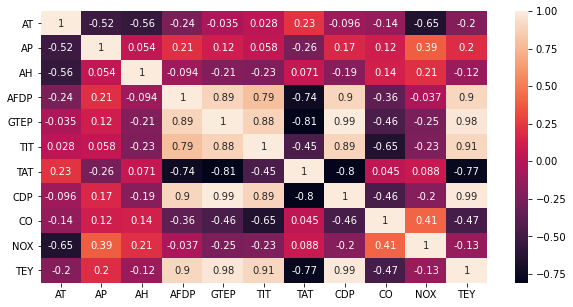

In [39]:
plt.figure(figsize = (10,5))
sns.heatmap(dataset.corr(), annot= True)
# plt.subplots(figsize=(20,15))
plt.show()

**A heat map is a two-dimensional representation of data in which values are represented by colors.** Heat maps allow the viewer to understand complex data sets. Heat map use color to communicate relationships between data values that would be would be much harder to understand if presented numerically in a spreadsheet.


- CO is most correlated with NOX with 0.68 
- Positively correlated datas are AP, AH, TAT and CO
- Negatively correlated datas are AT, AFDP, GTEP, TIT, TEY and CDP

## 3. Data Cleaning Manipulation

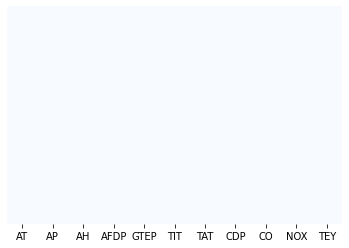

In [40]:
# Checking which dataset is missing
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

In [41]:
# Checking if any dataset is duplicate
dataset.duplicated().any()

False

## 4. Regression task and Its Accuracy

**Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.** 
    
   We can use multiple linear regression to find out how strong the relationship is between two or more independent variables and one dependent variable (e.g. How Ambient temperature(AT), Ambient pressure (AP), Ambient humidity(AH), Air filter difference pressure (AFDP), Gas turbine exhaust pressure (GTEP), Turbine inlet temperature(TIT), Turbine after temperature(TAT), Compressor discharge pressure (CDP), Carbon monoxide(CO) and Nitrogen oxides (NOx) added Turbine energy yield (TEY)). Also we can use multiple linear regression to find out the value of the dependent variable at a certain value of the independent variables (e.g. the expected Turbine energy yeild (TEY) at certain levels of Ambient temperature(AT), Ambient pressure (AP), Ambient humidity(AH), Air filter difference pressure (AFDP), Gas turbine exhaust pressure (GTEP), Turbine inlet temperature(TIT), Turbine after temperature(TAT), Compressor discharge pressure (CDP), Carbon monoxide(CO) and Nitrogen oxides (NOx)).
   
**Multiple linear regression formula**


yi = B0 + B1X1 + ... BnXn 

- y = the predicted value of the dependent variable
- B0 = the y-intercept (value of y when all other parameters are set to 0)
- B1X1= the regression coefficient (B1) of the first independent variable (X1) (a.k.a. the effect that increasing the value of the independent variable has on the predicted y value)
- … = do the same for however many independent variables you are testing
- BnXn = the regression coefficient of the last independent variable

In [42]:
# Importing libraries for linear regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction. There are different components of Scikit-learn like Supervised learning algorithms, Cross-validation, Cross-validation and many more.

In [43]:
# Selecting TEY for y and other for X (Dependent and Independent Variables) 
x=dataset[list(dataset)[0:10]]
y=dataset[list(dataset)[10]]

We have divided the datas into “attributes” and “labels”.

Attributes are the independent variables while labels are dependent variables whose values are to be predicted. 

In [44]:
# First five datas from X
x.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,11.910,0.26747,82.028


In [45]:
# First five datas from Y
y.head()

0    134.67
1    134.67
2    135.10
3    135.03
4    134.67
Name: TEY, dtype: float64

In [46]:
# Training datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

We have split 80 % of the data to the training set while 20 % of the data to test set using above code.
The test_size variable is where we actually specify the proportion of the test set. For multiple times of execution of our model, random state make sure that data values will be same for training and testing data sets. It fixes the order of data for train_test_split

In [47]:
# Fitting the linear model with coefficients
model = LinearRegression()
model.fit(x_train,y_train) #training the algorithm

LinearRegression()

After splitting the data into training and testing sets, We have to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [48]:
# Printing the intercept and coefficient of the model
print(model.intercept_)
print(list(zip(x, model.coef_)))

-133.5295241444817
[('AT', -0.3575099402001267), ('AP', -0.06742574554524917), ('AH', -0.007818430646280867), ('AFDP', -0.4807606105490754), ('GTEP', 0.3365190135726942), ('TIT', 0.6122926898691), ('TAT', -0.6294361442787051), ('CDP', 1.425354522969855), ('CO', 0.017842009360155595), ('NOX', -0.01704960737980829)]



As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. From above code, we can find the value of the intercept and slop calculated by the linear regression algorithm for our dataset

In [49]:
# Making prediction model
y_pred_model = model.predict(x_test)

In [50]:
# New dataframe to plot regression
dataFrame_Pred_y = pd.DataFrame(y_pred_model, columns = ['TEY'])
dataFrame_Pred_y.head()

,TEY
0,111.329464
1,133.841427
2,111.949714
3,134.562130
4,133.845467


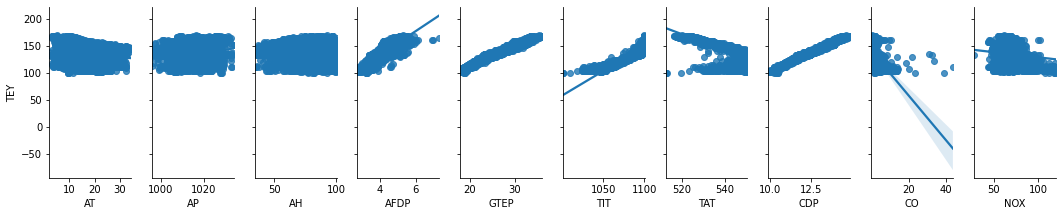

In [51]:
# Plotting regression with x_test as independent variable and dataFrame_Pred_y as dependent variable
sns.pairplot(dataset,x_vars=x_test,y_vars=dataFrame_Pred_y,height = 3, aspect = 0.5,kind="reg");

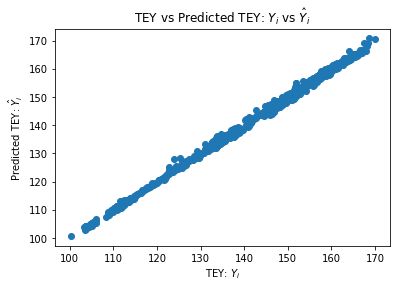

In [52]:
# Plotting scatter plot for Predicted NOX vs Actual NOX
plt.scatter(y_test, y_pred_model)
plt.xlabel("TEY: $Y_i$")
plt.ylabel("Predicted TEY: $\hat{Y}_i$")
plt.title("TEY vs Predicted TEY: $Y_i$ vs $\hat{Y}_i$")
plt.show()

The above plot shows that our predicted TEY is very close to actual TEY

In [53]:
ActualandPredicted = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_model.flatten()})
ActualandPredicted.head()

,Actual,Predicted
0,111.54,111.329464
1,134.39,133.841427
2,111.76,111.949714
3,134.74,134.562130
4,133.48,133.845467


In [54]:
print(model.score(x_test, y_test))

0.9982228583823174


Score makes predictions using x_test under the hood and uses those predictions to calculate accuracy score.

**We have a score (Accuracy) of 99%**

In [55]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_model)
r2_score = metrics.r2_score(y_test, y_pred_model)
mean_squared_error =  metrics.mean_squared_error(y_test, y_pred_model)
print('Mean Absolute Error:', meanAbErr) # Mean Absolute Error
print(f'R2 Score: {r2_score}') # R Squared value
print(f'Mean Squared Error : {mean_squared_error}') # Mean Squared Error

Mean Absolute Error: 0.5136707727235371
R2 Score: 0.9982228583823174
Mean Squared Error : 0.47829348423275525


The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 

Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.